In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/data_clean.csv')

In [15]:
# train test split, 80:20
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns != "loan_repaid"]
y = df["loan_repaid"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

In [16]:
# Normalize Data

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
# upsample minority class
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Over Sampling
rus = RandomOverSampler(random_state=0)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
X_train = X_train_res
y_train = y_train_res

Before OverSampling, counts of label '1': 6867
Before OverSampling, counts of label '0': 40592 

After OverSampling, counts of label '1': 40592
After OverSampling, counts of label '0': 40592


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_acc_list = [] #test accuracies
train_acc_list = [] #train accuracies

def train_and_test_classifier(classifier, X_train, y_train, y_test, verbose=False):  
    """
    fits a classifier to the provided training data, prints out and returns the prediction 
    accuracy on both training and test sets.
    
    """
    # train features, train target
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)

    # Summary of the prediction
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Accuracy
    train_acc = accuracy_score(classifier.predict(X_train),y_train)
    test_acc = accuracy_score(y_pred,y_test)
    print("Train Accuracy of the model is: ", train_acc)
    print("Test Accuracy of the model is: ", test_acc)

    
    return train_acc, test_acc

In [19]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

res = train_and_test_classifier(rf,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10171
           1       0.49      0.02      0.03      1694

    accuracy                           0.86     11865
   macro avg       0.67      0.51      0.48     11865
weighted avg       0.81      0.86      0.80     11865

[[10144    27]
 [ 1668    26]]
Train Accuracy of the model is:  1.0
Test Accuracy of the model is:  0.8571428571428571
(1.0, 0.8571428571428571)


In [20]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
log= LogisticRegression()

res = train_and_test_classifier(log,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

              precision    recall  f1-score   support

           0       0.90      0.63      0.74     10171
           1       0.20      0.56      0.30      1694

    accuracy                           0.62     11865
   macro avg       0.55      0.60      0.52     11865
weighted avg       0.80      0.62      0.67     11865

[[6370 3801]
 [ 738  956]]
Train Accuracy of the model is:  0.6128424320063066
Test Accuracy of the model is:  0.6174462705436157
(0.6128424320063066, 0.6174462705436157)


/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# svm takes too long for test comparisons

In [22]:
from sklearn.naive_bayes import ComplementNB
# ComplementNB is better for data with high class imbalance
nb = ComplementNB()
res = train_and_test_classifier(nb,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

              precision    recall  f1-score   support

           0       0.88      0.58      0.70     10171
           1       0.18      0.54      0.27      1694

    accuracy                           0.58     11865
   macro avg       0.53      0.56      0.49     11865
weighted avg       0.78      0.58      0.64     11865

[[5933 4238]
 [ 778  916]]
Train Accuracy of the model is:  0.5714426487977927
Test Accuracy of the model is:  0.57724399494311
(0.5714426487977927, 0.57724399494311)


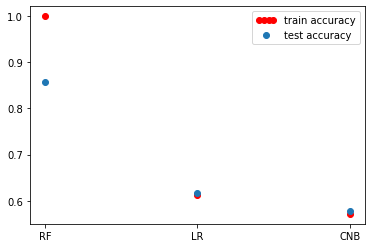

In [24]:
# Plots
from matplotlib.legend_handler import HandlerLine2D
class_model = [1,2,3]

my_xticks = ['RF','LR','CNB']

plt.xticks(class_model, my_xticks)
plot1, = plt.plot(class_model, train_acc_list, 'ro', label='train accuracy')
plot2, = plt.plot(class_model, test_acc_list, 'o', label='test accuracy')


plt.legend(handler_map={plot1: HandlerLine2D(numpoints=4)})
plt.show()